In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.0
2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [41]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [76]:
X_train_full.shape

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

Each pixel intensity is represented as a byte (0 to 255):

In [5]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [82]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

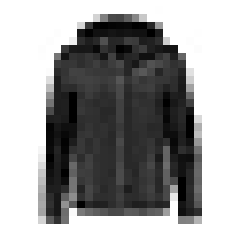

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

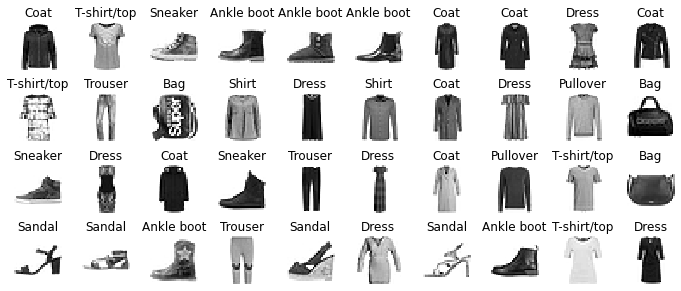

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad.
Porównaj wyniki architektury fully connected (najlepszej jaką uda ci się zbudować) i architektury konwolucyjnej (najlepszej jaką uda ci się zbudować).


Wizualizuj wyniki:

* porównaj krzywe uczenia


In [12]:
from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Dense
from keras.callbacks import History

model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.3))

model.add(Dense(300))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.3))

model.add(Dense(100))
model.add(BatchNormalization())
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.3))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history1 = History()

history1 = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0209 - accuracy: 0.6449 - val_loss: 0.5849 - val_accuracy: 0.7870
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7469 - accuracy: 0.7346 - val_loss: 0.5169 - val_accuracy: 0.8088
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6821 - accuracy: 0.7559 - val_loss: 0.4902 - val_accuracy: 0.8218
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6503 - accuracy: 0.7661 - val_loss: 0.4734 - val_accuracy: 0.8268
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6275 - accuracy: 0.7739 - val_loss: 0.4644 - val_accuracy: 0.8298
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6084 - accuracy: 0.7788 - val_loss: 0.4491 - val_accuracy: 0.8342
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5996 - accuracy: 0.7819 - val_loss: 0.4428 - val_accuracy:

In [83]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
y_train = y_train.reshape(len(y_train), 1)
y_train = onehot_encoder.fit_transform(y_train)
y_valid = y_valid.reshape(len(y_valid), 1)
y_valid = onehot_encoder.fit_transform(y_valid)

In [84]:
from keras.layers.convolutional import Conv2D, MaxPooling2D


history2 = History()

model = Sequential()
model.add(Conv2D(6,(3,3),input_shape=(28,28,1)))

model.add(MaxPooling2D((2,2)))

model.add(Conv2D(16,(3,3),input_shape=(28,28,1)))

model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(120,activation="relu"))
model.add(Dense(84,activation="relu"))

model.add(Dense(10,activation="softmax"))
#model.summary()

early_stopping = EarlyStopping(patience=30,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(X_train, y_train, validation_data=(X_valid,y_valid),epochs=30,callbacks=[early_stopping, history2])

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5369 - accuracy: 0.8044 - val_loss: 0.4089 - val_accuracy: 0.8516
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3632 - accuracy: 0.8661 - val_loss: 0.3481 - val_accuracy: 0.8742
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3119 - accuracy: 0.8847 - val_loss: 0.3248 - val_accuracy: 0.8810
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2827 - accuracy: 0.8947 - val_loss: 0.2884 - val_accuracy: 0.8924
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2570 - accuracy: 0.9044 - val_loss: 0.2784 - val_accuracy: 0.8968
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2371 - accuracy: 0.9105 - val_loss: 0.2827 - val_accuracy: 0.8946
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2201 - accuracy: 0.9168 - val_loss: 0.2736 - val_accuracy:

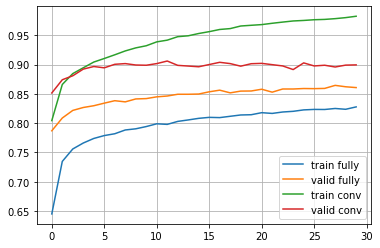

In [86]:
plt.plot(pd.DataFrame(history1.history["accuracy"]),label="train fully")
plt.plot(pd.DataFrame(history1.history["val_accuracy"]),label="valid fully")

plt.plot(pd.DataFrame(history2.history["accuracy"]),label="train conv")
plt.plot(pd.DataFrame(history2.history["val_accuracy"]),label="valid conv")

plt.legend()
plt.grid(True)
plt.show()